## Data Analytics Questions

You were given a 'practice_dataset.csv' dataset, that contains data about average salary of some school graduates.
Please read in this file here, and explore it.

In [ ]:
import pandas as pd
import json
import re
import requests
from bs4 import BeautifulSoup

In [ ]:
data = pd.read_csv('/content/practice_dataset.csv')

## Task 1.
In the dataset there is a 'School Type' column that has numircal values: they are IDs for keys that are given in 'school_type.json' file. Please, map over these IDs to replace them with their keys. Here is an expected outcome:

In [ ]:
with open('school_type.json', 'r') as json_file:
    values = json.load(json_file)

json_df = pd.DataFrame(values)

id_to_value_dict = dict(zip(json_df['ID'], json_df['VALUE']))

data['School Type'] = data['School Type'].map(id_to_value_dict)



In [ ]:
print(data)

                                      School Name  School Type  \
0     Massachusetts Institute of Technology (MIT)  Engineering   
1        California Institute of Technology (CIT)  Engineering   
2                             Harvey Mudd College  Engineering   
3    Polytechnic University of New York, Brooklyn  Engineering   
4                                    Cooper Union  Engineering   
..                                            ...          ...   
264                  Austin Peay State University        State   
265                    Pittsburg State University        State   
266                      Southern Utah University        State   
267           Montana State University - Billings        State   
268                  Black Hills State University        State   

    Starting Median Salary Mid-Career Median Salary  \
0              $72,200.00              $126,000.00    
1              $75,500.00              $123,000.00    
2              $71,800.00              $12

![image-2.png](attachment:image-2.png)

## Task 2
We defined a function that takes any 'School Type' value, and estimates rounded average 'Mid-Career Median Salary'for it. However, our funciton is not working. Please find an error and try to fix it.

In [ ]:
def function_1(school_type):
    result=round(df[df['School Type']==school_type]['Mid-Career Median Salary'].mean(),2)
    return result

In [ ]:
function_1('Engineering')

If you fix an error, apply this function to values 'Engineering', 'Party', 'Liberal Arts' and print output of the function, the end result must looks like this:

![image.png](attachment:image.png)

In [ ]:
def extract_num_value(s):
    try:
        return float(s)
    except ValueError:
        numeric_part = ''.join(filter(str.isdigit, s))
        try:
            return float(numeric_part)
        except ValueError:
            return None

def function_1(school_type, data):
    data['Mid-Career Median Salary'] = data['Mid-Career Median Salary'].apply(extract_num_value)

    result = data[data['School Type'] == school_type]['Mid-Career Median Salary'].dropna().mean()

    return round(result / 100, 2)

In [ ]:
print(function_1('Engineering',data))
print(function_1('Party',data))
print(function_1('Liberal Arts',data))

103842.11
84685.0
89378.72


## Task 3
According to the National Occupational Employment and Wages Estimates, the average salary in the United States is 56,310 USD annaully. Iterate over 'Starting Median Salary' column and assign value 'more than national average' if it is more than 56,310 USD, else 'less than national average'. The result is supposed to be as such:

![image-2.png](attachment:image-2.png)

In [ ]:
salary = data['Starting Median Salary']
numbers = []
for i in range(len(salary)):
  numbers.append(salary[i].translate({ord(j): None for j in '$,.'}))


In [ ]:
int_salary = []
for i in numbers:
  int_salary.append(int(int(i)/100))

In [ ]:
monitoring_salary = []

for i in int_salary:
  if i > 56310:
    monitoring_salary.append('more than national average')
  else:
    monitoring_salary.append('less than national average')

result = pd.DataFrame(monitoring_salary)

In [ ]:
data['Starting Median Salary'] = result

In [ ]:
print(data)

                                      School Name  School Type  \
0     Massachusetts Institute of Technology (MIT)  Engineering   
1        California Institute of Technology (CIT)  Engineering   
2                             Harvey Mudd College  Engineering   
3    Polytechnic University of New York, Brooklyn  Engineering   
4                                    Cooper Union  Engineering   
..                                            ...          ...   
264                  Austin Peay State University        State   
265                    Pittsburg State University        State   
266                      Southern Utah University        State   
267           Montana State University - Billings        State   
268                  Black Hills State University        State   

         Starting Median Salary  Mid-Career Median Salary  \
0    more than national average                12600000.0   
1    more than national average                12300000.0   
2    more than national 

Now, display all state schools that have less than national average salary.

In [ ]:
for i in range(len(int_salary)):
  if int_salary[i] < 56310:
    print(data['School Name'][i])

Illinois Institute of Technology (IIT)
Wentworth Institute of Technology
Virginia Polytechnic Institute and State University (Virginia Tech)
South Dakota School of Mines & Technology
New Mexico Institute of Mining and Technology (New Mexico Tech)
Rochester Institute of Technology (RIT)
Embry-Riddle Aeronautical University (ERAU)
Tennessee Technological University
University of Illinois at Urbana-Champaign (UIUC)
University of Maryland, College Park
University of California, Santa Barbara (UCSB)
University of Texas (UT) - Austin
State University of New York (SUNY) at Albany
University of Florida (UF)
Louisiana State University (LSU)
University of Georgia (UGA)
Pennsylvania State University (PSU)
Arizona State University (ASU)
Indiana University (IU), Bloomington
University of Iowa (UI)
Randolph-Macon College
University of Alabama, Tuscaloosa
University of Mississippi
University of New Hampshire (UNH)
West Virginia University (WVU)
University of Tennessee
Ohio University
Florida State Un

## Task4
You might have realised that some columns have missing values. Display all rows that has at least one missing value in any column. Then, consider how would you handle these missing values? Please, describe below your thoughts

In [ ]:

# Handling missing values depends on the importance of other values of particular
# column where we are missing a value and the result we want to get. For example,
# if second or third column has the most missing values, we can remove this column
# considering how this affects the result we want. Moreover, we can use different
# imputation like swapping missing values with mean of the whole column. Another
# way can be using the predictive models like regression to predict missing values.

In [ ]:
nan_check = data.isnull()

rows_with_nan = data[nan_check.any(axis=1)]

print(rows_with_nan)

                                          School Name   School Type  \
1            California Institute of Technology (CIT)   Engineering   
2                                 Harvey Mudd College   Engineering   
4                                        Cooper Union   Engineering   
15  New Mexico Institute of Mining and Technology ...   Engineering   
31                             Randolph-Macon College         Party   
41                                    Amherst College  Liberal Arts   
43                                    Bowdoin College  Liberal Arts   
44                          College of the Holy Cross  Liberal Arts   
45                                 Occidental College  Liberal Arts   
46                      Washington and Lee University  Liberal Arts   
47                                 Swarthmore College  Liberal Arts   
48                                   Davidson College  Liberal Arts   
49                                   Carleton College  Liberal Arts   
50    

## Task 5
Please visit this web page: https://www.upgradabroad.com/articles/forbes-unveils-americas-top-colleges-2022-list-news/
It contains several tables, that show some university rankings. Scroll till you reach "Forbes college rankings" field. First, scrape HTML table from this field and save as forbes_ranking. Then, write a function that creates new column "Ranked on Forbes" in practice_dataset and accepts Boolean values (True or False) based on the fact whether this university in forbes_ranking or not. Final result should look as follows:

![image.png](attachment:image.png)

In [ ]:
def scrape_html(url):
    try:
        tables = pd.read_html(url)

        if len(tables) > 0:
            df = tables[0]
            return df
        else:
            print("No tables found on the page.")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

url = "https://www.upgradabroad.com/articles/forbes-unveils-americas-top-colleges-2022-list-news/"

ranking_df = scrape_html(url)

if ranking_df is not None:
    ranking_df.to_csv('forbes_ranking.csv', index=False)

In [ ]:
colleges = []
for i in ranking_df[1]:
  colleges.append(i)
colleges.remove('Colleges')
colleges[0] = 'Massachusetts Institute of Technology (MIT)'

In [ ]:
data['Ranked on Forbes'] = data['School Name'].isin(colleges)
data

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Ranked on Forbes
0,Massachusetts Institute of Technology (MIT),Engineering,more than national average,12600000.0,"$76,800.00","$99,200.00","$168,000.00","$220,000.00",True
1,California Institute of Technology (CIT),Engineering,more than national average,12300000.0,NaN,"$104,000.00","$161,000.00",NaN,False
2,Harvey Mudd College,Engineering,more than national average,12200000.0,NaN,"$96,000.00","$180,000.00",NaN,False
3,"Polytechnic University of New York, Brooklyn",Engineering,more than national average,11400000.0,"$66,800.00","$94,300.00","$143,000.00","$190,000.00",False
4,Cooper Union,Engineering,more than national average,11400000.0,NaN,"$80,200.00","$142,000.00",NaN,False
...,...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,less than national average,5920000.0,"$32,200.00","$40,500.00","$73,900.00","$96,200.00",False
265,Pittsburg State University,State,less than national average,5820000.0,"$25,600.00","$46,000.00","$84,600.00","$117,000.00",False
266,Southern Utah University,State,less than national average,5650000.0,"$30,700.00","$39,700.00","$78,400.00","$116,000.00",False
267,Montana State University - Billings,State,less than national average,5060000.0,"$22,600.00","$31,800.00","$78,500.00","$98,900.00",False


## Task 6
If time spent by website visitors on two difernet landing pages could be drawn as below, so that average time spent is the same for both. Based on the graph solely, what do you think what landing page (red or purple) performes better and why?

![image.png](attachment:image.png)

The red one, representing a normal distribution with a mean of 10 and a standard deviation of 2, suggests that the majority of visitors spend time around the mean value of 10. However, due to the wider shape of the graph (higher standard deviation), there will be some visitors who spend considerably more time and some who spend considerably less time on the landing page. This indicates that the page's performance may be more varied, with some visitors highly engaged and spending a long time, while others might leave relatively quickly.

The Purple one, representing a normal distribution with a mean of 10 and a standard deviation of 1, indicates that visitors' time spent on the landing page is more tightly clustered around the mean value of 10. The narrower shape of the hill (lower standard deviation) suggests that there is less variability in the time spent, and more visitors are spending time closer to the average value.

## Task 7
if a die is thrown 6 times, what is the probability of 3 of the numbers being even numbers?

In [ ]:
"""
To calculate the probability of rolling exactly 3 even numbers when a die
is thrown 6 times, we can use the binomial probability formula.
"""

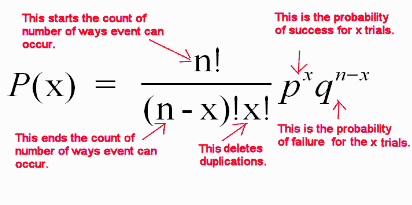

In [ ]:
"""
P(X = 3) = (6C3) * (1/2)^3 * (1 - 1/2)^(6-3)


6C3 = 6! / (3! * (6-3)!) = 20


P(X = 3) = 20 * (1/2)^3 * (1/2)^3 = 20 * (1/8) = 20/8 = 2.5

Answer is 2.5%
"""